## Abstract

Con questa presentazione voglio mostrare come, partendo dai dati presi in laboratori il 13 settembre 2021 a 22 KV con led acceso a 3V, ho graficato le forme d'onda e successivamente (per ogni forma d'onda) calcolato l'integrale attorno al massimo in una finestra di campioni ben definita. Plottando in un grafico in scala lineare queste aree ho ottenuto uno spettro con un picco definito.

## Forme d'onda

Tramite una funzione di numpy ho calcolato la **baseline** come **media sui primi 40 campioni** dei dati che ho considerato, l'ho successivamente sottratta al segnale  e ribaltato il risultato in modo da ottenere forme d'onda con picchi positivi.

Questo è il codice che ho usato:

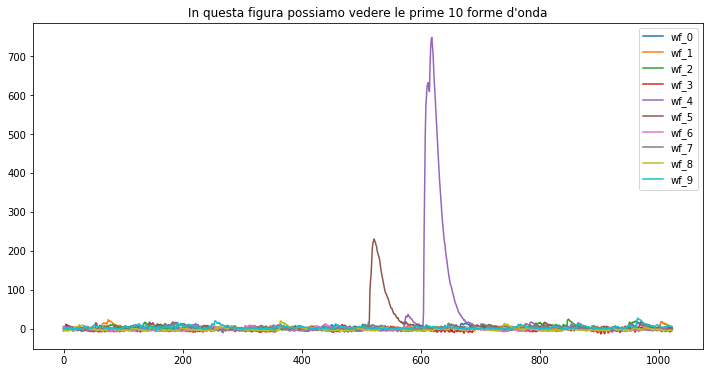

In [2]:
for i in range(n):
    bl=np.mean(dataLED[i][:40]) 
    wf=(dataLED[i]-bl)*(-1)

## Posizione del massimo

Sapendo che i campioni sono presi ogni 10ns ho cercato il picco in una finestra di 70 campioni a partire dalla metà -10 (sapendo che il led è acceso per ~300ns). In particolare nel file considerato ci sono un totale di 1024 campioni quindi ho definito l'intervallo in cui cercare la posizione del massimo come $ [inf,sup]=[502,572] $.

Per determinare la posizione del massimo ho usato la funzione **where** di numpy associata alla funzione **max** con il seguente comando: <br>   

>max_pos=inf+np.where(wf[inf:sup]==np.max(wf[inf:sup]))[0]**[0]**

**Notiamo** che la funzione *np.where* restituisce un array quindi per selezionare il primo elemento ho specificando la posizione da considerare con **[0]**

## Intervallo di integrazione

L'intervallo di integrazione intorno al massimo è stato definito a partire dai due punti (idx1 e idx2) in cui la forma d'onda torna ad essere minore di 3 volte la deviazione standar (calcolata sui primi 40 campioni), anche se ci sono stati dei casi particolari da gestire con delle eccezioni.

L'estremo destro ($a$) e l'estremo sinistro ($b$) dell'integrale sono stati definiti come: 
>$a$=idx1-2 <br>
> $b$=idx2+2

Dove:

* Se la forma d'onda nel massimo è maggiore di 3std:
    >idx1= np.where(wf[0:max_pos]<3std)[0]**[-1]** <br>
    >
    >idx2= max_pos+np.where(wf[max_pos:nn]<3std)[0]**[0]**
    
    Esempio: grafico della forma d'onda 6:





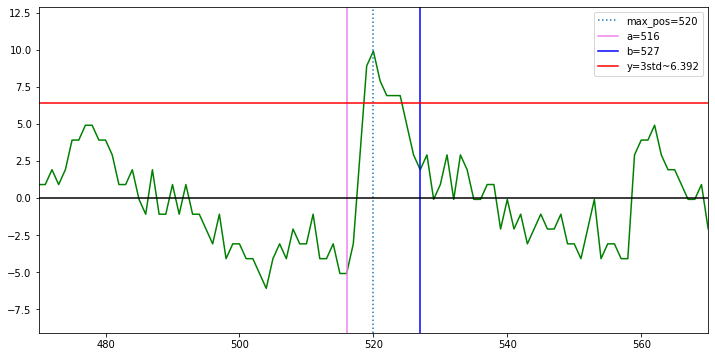

* Se la forma d'onda nel massimo è minore di 3std abbiamo considerato come soglia la baseline:
    >idx1= np.where(wf[0:max_pos]<0)[0]**[-1]**  <br>
    >
    >idx2= max_pos+np.where(wf[max_pos:nn]<0)[0]**[0]**
    
    Esempio: grafico della forma d'onda 15:


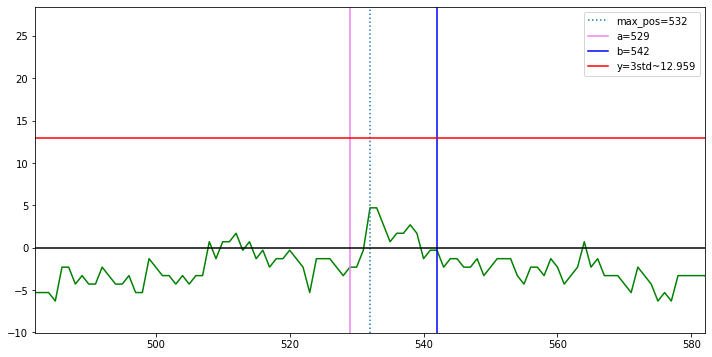

* Se la forma d'onda nel massimo è maggiore di 3std e dopo il massimo non torna mai ad essere minore di 3std calcoliamo l'integrale fino alla fine della forma d'onda. <br> <br>Esempio: grafico della forma d'onda 499974:

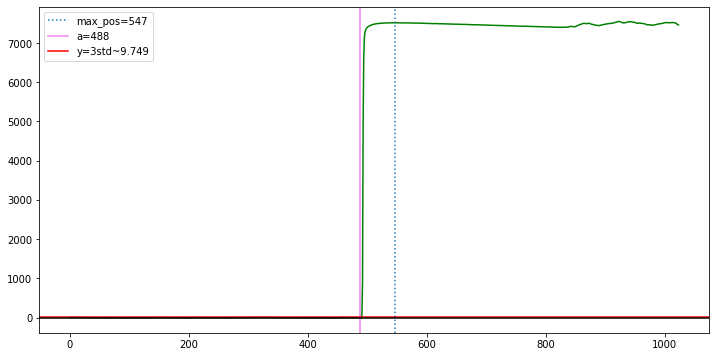

* Se la forma d'onda nel massimo è minore di 3std e dopo il massimo, prima di diventare minore di 0, torna ad essere maggiore di 3std abbiamo inserito un'eccezione che ci segnala il problema.<br> <br>Esempio: grafico della forma d'onda 574137:

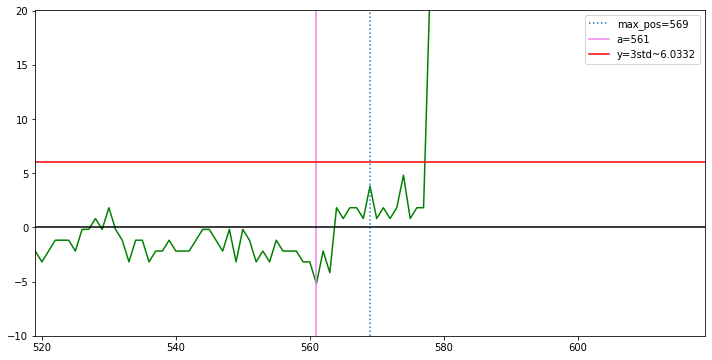

**Notiamo** anche in questo caso la funzione *np.where* restituisce un array quindi abbiamo selezionato l'elemento da considerare specificando la posizione:
* **[0]** per indicare il primo elemento nella definizione di idx2 
* **[-1]** per indicare l'ultimo elemento nella definizione di idx1

Inoltre **notiamo** che per determinare idx1 e idx2 non mi sono limitata a cercarli nell'intervallo $[inf,sup]$.

Una volta definiti $a$ e $b$ abbiamo calcolato l'integrale denominandolo **area** e salvato tutto in un DataFrame.

Di seguito il codice che ho usato per gestire le eccezioni e salvare il dataframe:

In [ ]:
    try:
        if wf[max_pos]>3*std :
            idx1= np.where(wf[0:max_pos]<3*std)[0][-1]
            
        else:
            idx1= np.where(wf[0:max_pos]<0)[0][-1]
                        
    except:
        print("Per wf_",i,"non è possibile determinare l'estremo a dell'integrale")
           
    if wf[max_pos]>3*std :
        try:
            idx2= max_pos+np.where(wf[max_pos:nn]<3*std)[0][0]
            
        except:
            idx2=nn-2
    else:
        try:
            idx2= max_pos+np.where(wf[max_pos:nn]<0)[0][0]
            
        except:
            print("Per wf_",i,"non è possibile determinare l'estremo b dell'integrale")
        
    a=idx1-2
    b=idx2+2
    
    area=np.sum(wf[a:b])
        
    MAX.append(max_pos)
    AREA.append(area)
    
data = pd.DataFrame(columns=['pos_max','area'])
data['area'] = AREA
data['pos_max'] = MAX

data.to_hdf(f'data_ABALONE_.h5', key='df', mode='w')

A questo punto ho graficato le aree in scala lineare e ho ottenuto uno spettro con un picco definito:


_


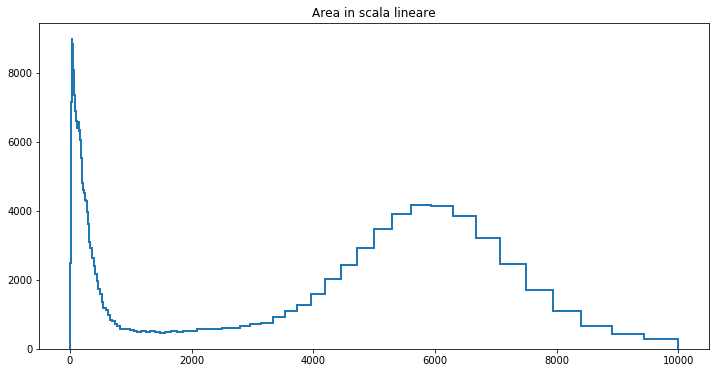